# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots in same notebook
%matplotlib inline

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Write your code here
print("Data has", df.shape[0],"rows and", df.shape[1],"columns")

Data has 1898 rows and 9 columns


#### Observations:
- Data has 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Here are the details about the data types of different columns in the table. They are categorized by their dtypes.
* float64(1) - cost_of_the_order
* int64(4) - order_id, customer_id, food_preparation_time, delivery_time 
* object(4) - restaurant_name, cuisine_type, day_of_the_week, rating

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* As seen in the output above there are no missing values in any columns of DataFrame.
* No treatment is needed

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# Statistical summary for food_preparation_time variable
print("food_preparation_time summary")

# Statistic for the column of interest can be found indivilually as shown below
print("min = ", np.round(df['food_preparation_time'].min(), 2))
print("mean = ", np.round(df['food_preparation_time'].mean(), 2))
print("max =", np.round(df['food_preparation_time'].max(), 2))

#Following line of code provides statistic summary for all numeric columns
df.describe().T

food_preparation_time summary
min =  20
mean =  27.37
max = 35


,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
Once order is placed,
* It takes a minimum of 20.00 minutes to prepare the food
* It takes a average of 27.37 minutes to prepare the food
* It takes a maximum of 35.00 minutes to prepare the food

### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
# Write the code here
#Let's find counts for each distinct value in 'rating' colums
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
* 736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Observations

* order_id - Numerical but discrete variable, probably auto-generated id for each order. There is no value in analyzing this variable.



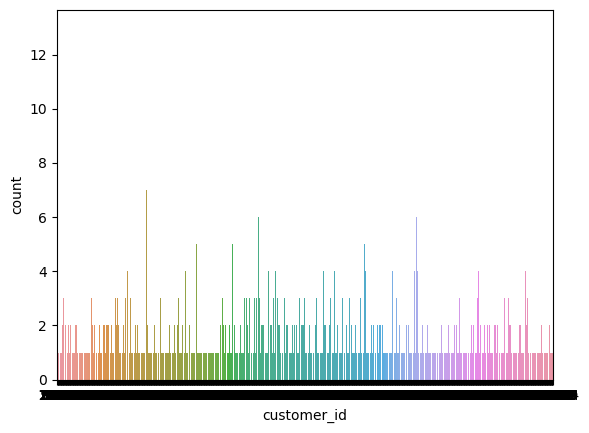

In [8]:
sns.countplot(data=df, x='customer_id')
plt.show()

Number of orders for customers
min= 1 median= 1.0 max= 13


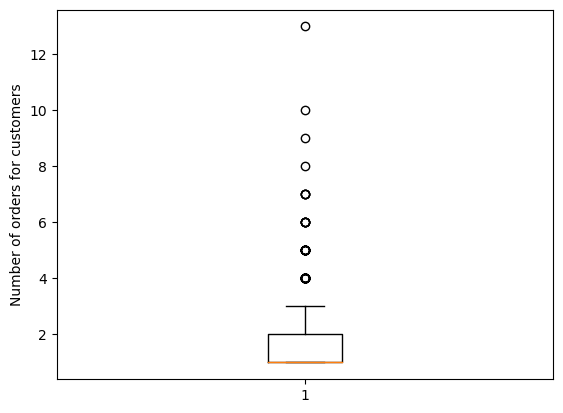

In [9]:
#Find information about frequent customers
customer_counts= df['customer_id'].value_counts()

print('Number of orders for customers')
print('min=',customer_counts.min(), 'median=', customer_counts.median(), 'max=',customer_counts.max())
plt.boxplot(customer_counts)
plt.ylabel('Number of orders for customers')
plt.show()

### Observations
* Most customers have ordered using the Food delivery app only once
* There are some outliers who have ordered food between 4 to 13 times in the sampling period

<Axes: >

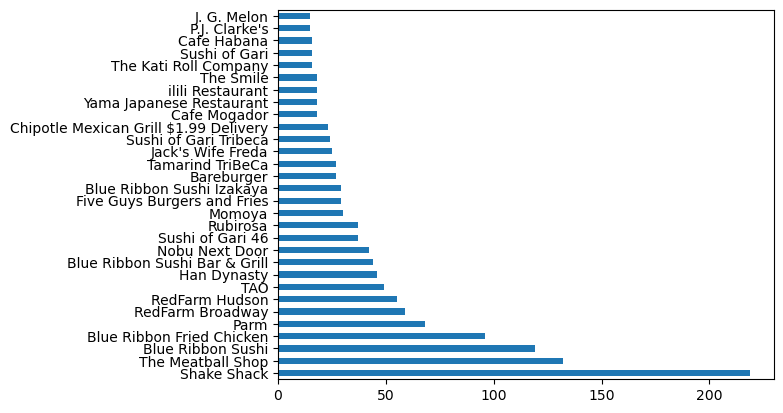

In [10]:
#print top 30 most popular restaurants
r_counts= df['restaurant_name'].value_counts().sort_values(ascending=False)
r_counts[:30].plot(kind='barh')

<Axes: >

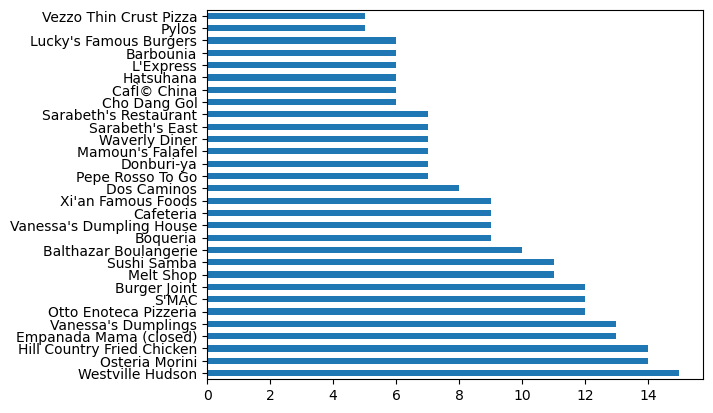

In [11]:
#print next 30 most popular restaurants
r_counts[30:60].plot(kind='barh')

### Observations
* Above plots shows top 60 most popular restuarants. 
* 'Shake Shack' is the most popular restaurant

Text(0.5, 1.0, 'cuisine type %')

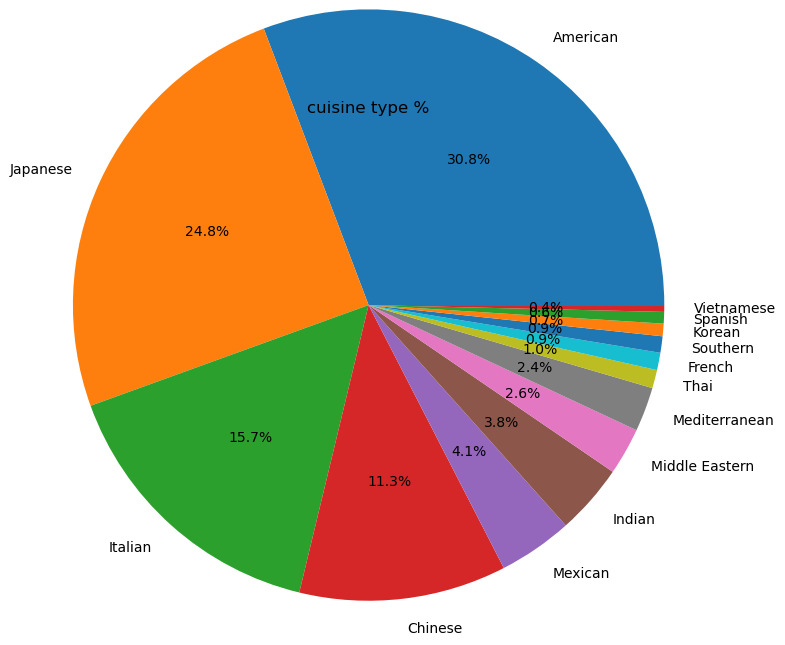

In [12]:
# Show the distribution of cuisine % in a pie chart
plt.pie(df['cuisine_type'].value_counts(), autopct='%.1f%%', radius=2, labels=df['cuisine_type'].value_counts().keys())
plt.title('cuisine type %')

### Observations
* Above pie chart shows the % distribution of cuisines where food was ordered
* American, Japanese, Italian and Chinese are the most polular cuisines.

Text(0, 0.5, 'Count')

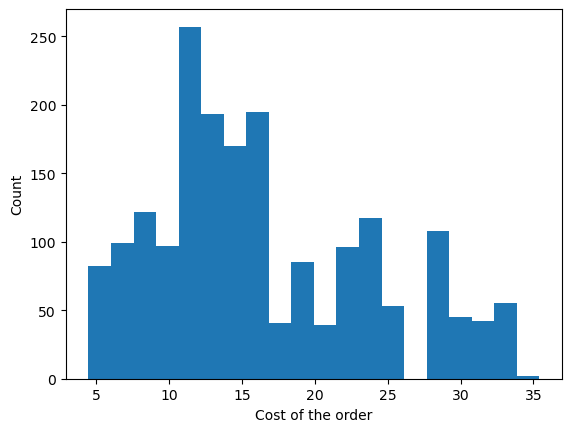

In [13]:
plt.hist(df['cost_of_the_order'], bins =20)
plt.xlabel('Cost of the order')
plt.ylabel('Count')

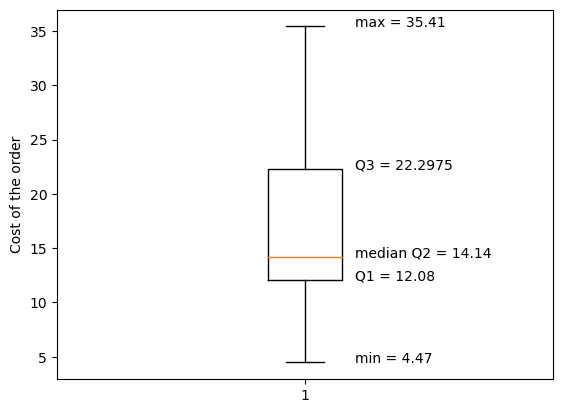

In [14]:
def showBoxPlot(data, variable, label):
    
    plt.boxplot(data[variable])
    plt.ylabel(label)

    def plotValue(x, l):
        plt.text(x = 1.1, y = x, s =l+' = '+str(x) ) 
    
    # add labels for five number summary
    plotValue(data[variable].min(), 'min')
    plotValue(data[variable].quantile(0.25), 'Q1')
    plotValue(data[variable].median(), 'median Q2')
    plotValue(data[variable].quantile(0.75), 'Q3')
    plotValue(data[variable].max(), 'max')
    
    plt.show()
    
# Show box plot for cost_of_the_order
showBoxPlot(df, 'cost_of_the_order', 'Cost of the order')

### Observations
- Cost of order ranges between 4.47 to 35.47 with a median of 14.14 dollars

Text(0, 0.5, 'Count')

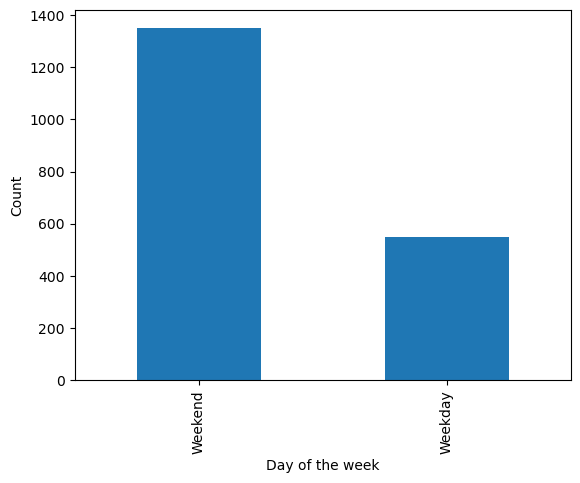

In [15]:
# Plot bar graph for categorical variable day_of_the_week
df['day_of_the_week'].value_counts().plot(kind='bar')
plt.xlabel('Day of the week')
plt.ylabel('Count')

### Observations
- This service is more popular during weekends as compared to a weekday
- Order volume is more than double during weekends as compared to a weekday.

Text(0, 0.5, 'Count')

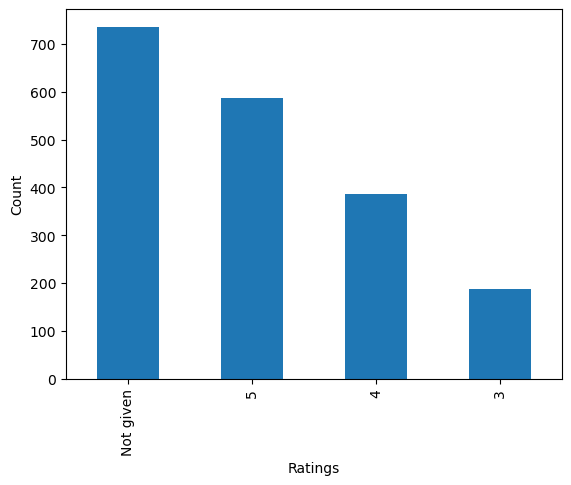

In [16]:
# Plot bar graph for categorical variable rating
df['rating'].value_counts().plot(kind='bar')
plt.xlabel('Ratings')
plt.ylabel('Count')

Text(0.5, 1.0, 'Rating %')

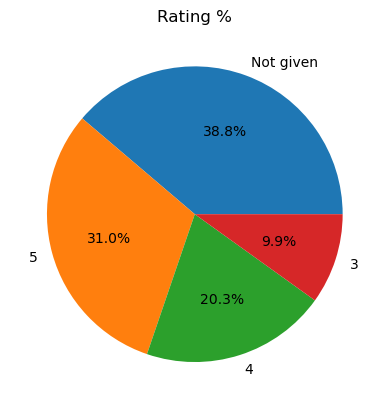

In [17]:
# Show the distribution of cuisine % in a pie chart
plt.pie(df['rating'].value_counts(), autopct='%.1f%%', radius=1, labels=df['rating'].value_counts().keys())
plt.title('Rating %')

### Observations
- It is hard to collect rating from a customer, 38.8% customers did not leave a review.
- But when they rate mostly they are very happy with service with rating of 5(31%)
- There are some customers who gave rating of 4(20.3%) or 3(9.9%) indicating some level of dissatisfaction

Text(0, 0.5, 'Count')

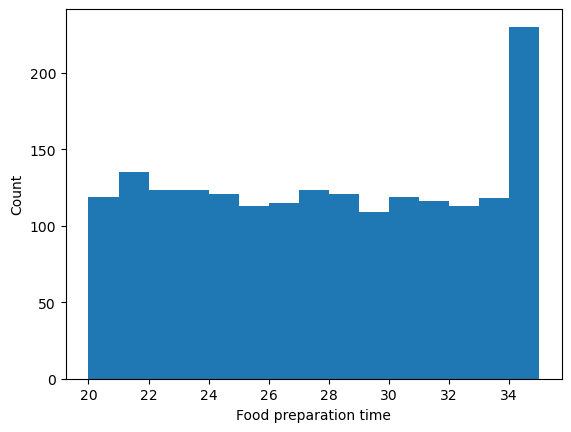

In [18]:
plt.hist(df['food_preparation_time'], bins =15)
plt.xlabel('Food preparation time')
plt.ylabel('Count')

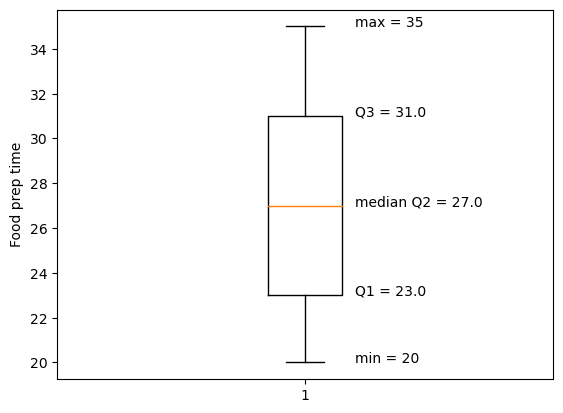

In [19]:
showBoxPlot(df, 'food_preparation_time', 'Food prep time')

### Observations
- Food preparation time is mostly uniformally distributed between 20-34 mins
- but there are over 250 orders which took 35 mins to prepare food
- Box plot above shows 5 point summary for food preparation time. The median food preparation time is 27 minutes

(array([177.,  78.,  83.,  90.,  88., 166.,  77., 162., 120., 141., 286.,
        148., 133.,  41., 108.]),
 array([15. , 16.2, 17.4, 18.6, 19.8, 21. , 22.2, 23.4, 24.6, 25.8, 27. ,
        28.2, 29.4, 30.6, 31.8, 33. ]),
 <BarContainer object of 15 artists>)

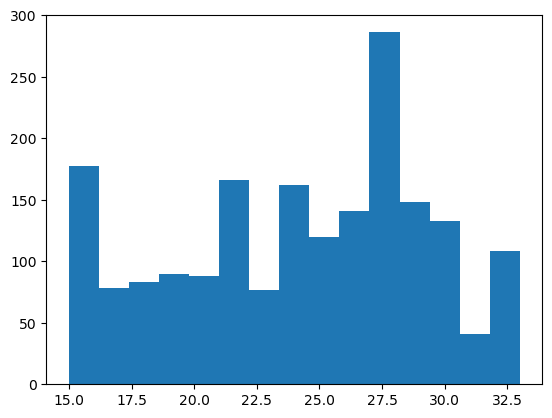

In [20]:
plt.hist(df['delivery_time'], bins =15)

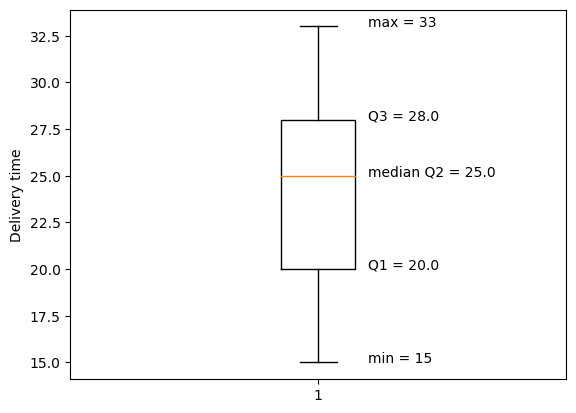

In [21]:
showBoxPlot(df, 'delivery_time', 'Delivery time')

### Observations
- Box plot above shows 5 point summary for delivary time
- Delivery ttime ranges from 15 to 33 mins with a median of 25 minutes


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [22]:
# Reusing the restuarant count series we created above
r_counts[:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
- Here are the top 5 restaurants, showing number of orders in the sample data 

    Shake Shack                  219

    The Meatball Shop            132

    Blue Ribbon Sushi            119

    Blue Ribbon Fried Chicken     96

    Parm                          68

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [23]:
#Select orders for 'Weekend'
weekends_data = df[df['day_of_the_week'] == 'Weekend']

# Count orders for cuisine types and sort descending
weekends_data['cuisine_type'].value_counts().sort_values(ascending=False)

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
- American restaurants are most popular on weekends as well

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [24]:

total_count = df['order_id'].count()
over_20_count = df[df['cost_of_the_order'] > 20]['order_id'].count()
print(over_20_count)
print("Orders over 20 dollars ", np.round((over_20_count/total_count * 100), 2), "%")

555
Orders over 20 dollars  29.24 %


#### Observations:
- About 29.24% of orders are costed more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [25]:
np.round(df['delivery_time'].mean(), 2)

24.16

#### Observations:
- The mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [26]:
# Find top 3 frequent customers
top_3 = df['customer_id'].value_counts().sort_values(ascending=False)[:3]

#### Observations:
Top 3 customers are,

1. 52832 - number of orders 13

2. 47440 - number of orders 10

3. 83287 - number of orders 9



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


/var/folders/s5/6rsbbgm948v4jr2td1_96_bh0000gn/T/ipykernel_52620/3411767231.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

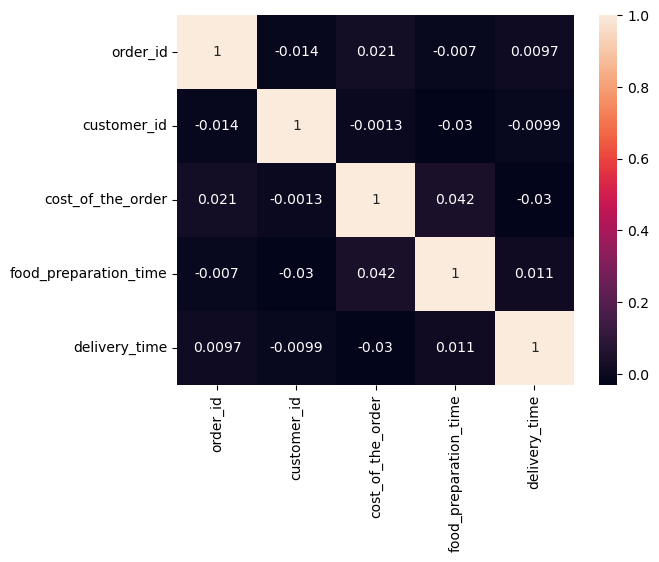

In [27]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

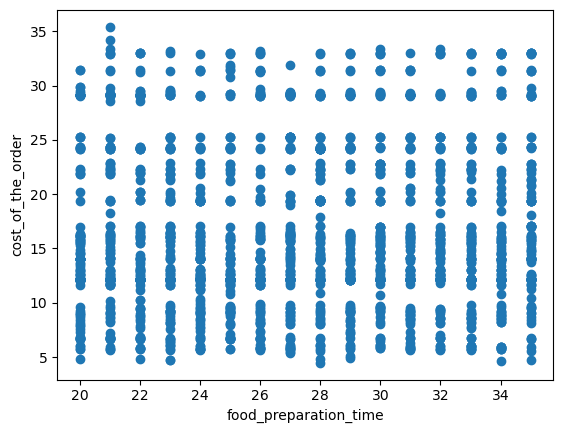

In [28]:
plt.scatter(x=df['food_preparation_time'], y=df['cost_of_the_order'])
plt.xlabel('food_preparation_time')
plt.ylabel('cost_of_the_order')
plt.show()

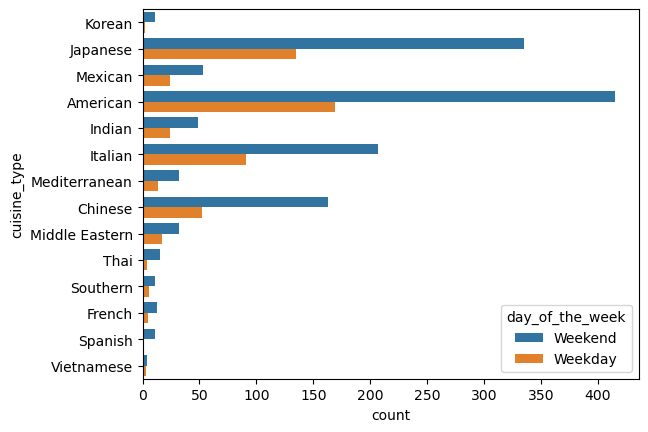

In [29]:
sns.countplot(data=df, hue='day_of_the_week', y='cuisine_type')
plt.show()

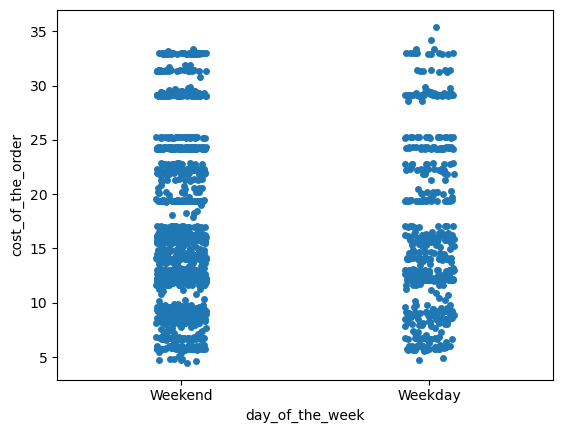

In [30]:
sns.stripplot(x='day_of_the_week',y='cost_of_the_order', data=df)
plt.show()

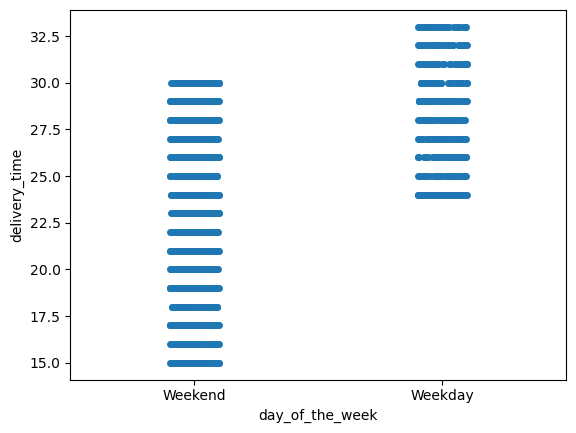

In [31]:
sns.stripplot(x='day_of_the_week',y='delivery_time', data=df)
plt.show()

In [32]:
# Create a new column for total time from placing the order to receiving
df['order_total_time'] = pd.to_numeric((df['food_preparation_time'] + df['delivery_time']), 'coerce')



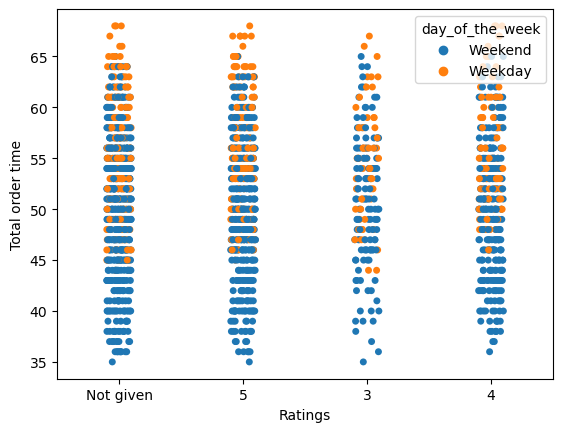

In [33]:
sns.stripplot(x='rating',y='order_total_time', data=df, hue='day_of_the_week')

plt.ylabel('Total order time')
plt.xlabel('Ratings')
plt.show()

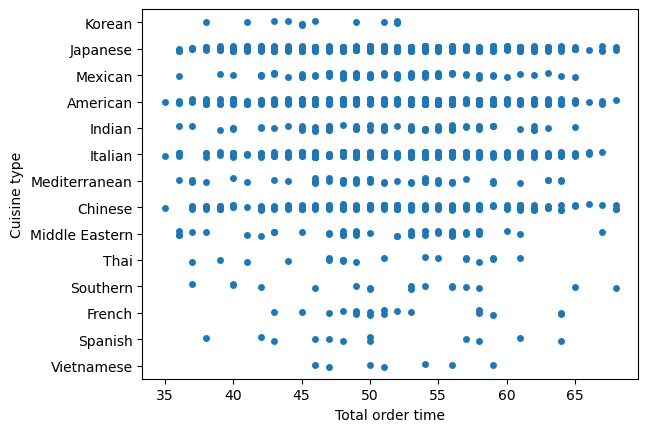

In [34]:
sns.stripplot(x='order_total_time', y='cuisine_type', data=df)

plt.xlabel('Total order time')
plt.ylabel('Cuisine type')
plt.show()

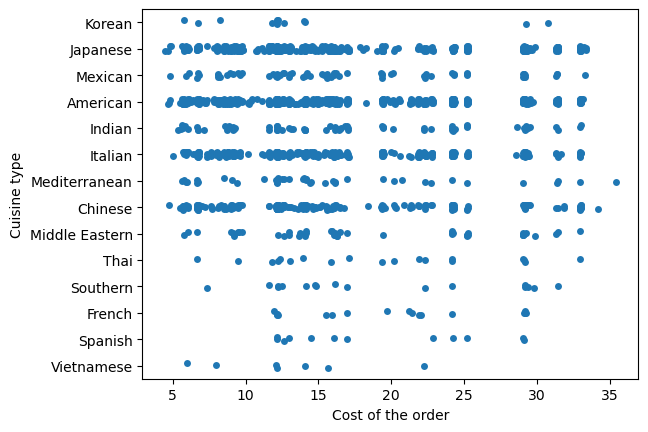

In [35]:
sns.stripplot(x='cost_of_the_order', y='cuisine_type', data=df)

plt.xlabel('Cost of the order')
plt.ylabel('Cuisine type')
plt.show()

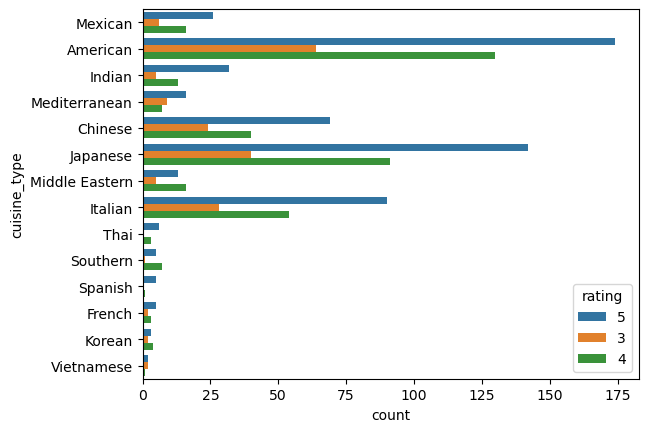

In [36]:
sns.countplot(data=df[df['rating'] != 'Not given'], hue='rating', y='cuisine_type')
plt.show()

#### Observations:

- There is a little correlation (r=0.042) between cost_of_the_order and food_preparation_time. Sounds like larger order takes slightly longer time to prepare
- More orders are placed during Weekends as compared to weekday
- Percent distribution of cuisine type remains similar between weekends and weekdays
- Its is more popular to place smaller orders through this app with a cost of 20 or less, over weekends as well as weekdays.
- Delivery time is higher on Weekdays than on weekends
- There is no significant correlation between Total order time (food preparation time + delivery) and ratings provided by customer
- There is no significant correlation between total order time (food preparation time + delivery) and cuisine type
- Across all cuisine types it is more popular to place smaller orders (lower cost)
- When customers provide rating, the distribution is similar across all cuisine types.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [37]:
# Create a numeric colum for ratings so we can analyze it better
df['rating_number'] = pd.to_numeric(df['rating'], 'coerce')

# Filter out not rated orders
rated_orders = df[df['rating'] != 'Not given']

# Count orders by restaurant name  for rated orders
rated_restaurant_counts = rated_orders['restaurant_name'].value_counts()

# Get the list of restaurants which has over 50 rated orders
restaurants_over50_ratings = (rated_restaurant_counts[rated_restaurant_counts > 50].keys())
print(restaurants_over50_ratings)

# Get all orders for restaurants with 50+ rated orders
orders_over50_ratings = rated_orders[rated_orders['restaurant_name'].isin(restaurants_over50_ratings)]

# Get ranking means
restaurants_over50_ranking_means = orders_over50_ratings.groupby('restaurant_name')['rating_number'].mean()

# Select restaurants with rankings means greater than 4
restaurants_over50_ranking_means[restaurants_over50_ranking_means > 4]


#Following is another way of doing this
# orders_over50_ratings.groupby('restaurant_name').agg({'rating_number':['count','mean']})


Index(['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi',
       'Blue Ribbon Fried Chicken'],
      dtype='object')


restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating_number, dtype: float64

#### Observations:
Following restaurants (showing ranking averages) fulfil expected criteria and are eligible to get the promotional offer

Blue Ribbon Fried Chicken    4.328125

Blue Ribbon Sushi            4.219178

Shake Shack                  4.278195

The Meatball Shop            4.511905

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [38]:
orders_20plus = df[df['cost_of_the_order'] > 20]
print(orders_20plus['cost_of_the_order'].mean())
orders_5to20 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]
print(orders_5to20['cost_of_the_order'].mean())



revenue_20plus = (orders_20plus['cost_of_the_order'].sum()) * 0.25
print('Revenue for over 20$ orders ', revenue_20plus)
revenue_5to20 = (orders_5to20['cost_of_the_order'].sum()) * 0.15
print('Revenue for orders 5-20$ ', revenue_5to20)
revenue = revenue_20plus + revenue_5to20

print('Net revenue for company is: $', np.round(revenue, 2), '')
print('percent revenue for orders over 20 is ', revenue_20plus/revenue*100, '%')

26.585423423423425
12.381686656671665
Revenue for over 20$ orders  3688.7275
Revenue for orders 5-20$  2477.5755000000004
Net revenue for company is: $ 6166.3 
percent revenue for orders over 20 is  59.820730509026234 %


#### Observations:

Net revenue for company is: $ 6166.3

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [39]:
total_orders = df['order_id'].count()

#using order_total_time column that was created by adding 
# food_prepapration_time and delivery_time for analysis above
delayed_orders = df[df['order_total_time'] > 60]['order_id'].count() 

delayed_order_percent = delayed_orders / total_orders * 100

np.round(delayed_order_percent, 2)


10.54

#### Observations:

10.54% of the orders took more than 60 minutes to prepare and deliver.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [40]:
weekend_delivery_mean = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print('Mean delivery time during weekends ', weekend_delivery_mean)

weekday_delivery_mean = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
print('Mean delivery time during weekdays ',weekday_delivery_mean)

weekday_delivery_mean-weekend_delivery_mean
# plt.pie(df['day_of_the_week'].value_counts(), autopct='%.1f%%', radius=1, labels=df['day_of_the_week'].value_counts().keys())
# plt.title('Day of the week %')

Mean delivery time during weekends  22.4700222057735
Mean delivery time during weekdays  28.340036563071298


5.870014357297798

#### Observations:

Mean delivery time during weekends  22.47 Minutes

Mean delivery time during weekdays  28.34 Minutes

Mean delivery time is more by 5.87 minutes during weekdays as compared to weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [41]:
df.groupby('cuisine_type')['rating_number'].mean().sort_values(ascending=False)

cuisine_type
Spanish           4.833333
Thai              4.666667
Indian            4.540000
Mexican           4.416667
Japanese          4.373626
Italian           4.360465
Chinese           4.338346
Southern          4.307692
French            4.300000
American          4.298913
Middle Eastern    4.235294
Mediterranean     4.218750
Korean            4.111111
Vietnamese        4.000000
Name: rating_number, dtype: float64

In [42]:
df.groupby('cuisine_type')['rating_number'].count().sort_values()

cuisine_type
Vietnamese          5
Spanish             6
Korean              9
Thai                9
French             10
Southern           13
Mediterranean      32
Middle Eastern     34
Mexican            48
Indian             50
Chinese           133
Italian           172
Japanese          273
American          368
Name: rating_number, dtype: int64

In [43]:
df.groupby('cuisine_type').agg({'rating_number':['count','mean']})

rating_number          
                       count      mean
cuisine_type                          
American                 368  4.298913
Chinese                  133  4.338346
French                    10  4.300000
Indian                    50  4.540000
Italian                  172  4.360465
Japanese                 273  4.373626
Korean                     9  4.111111
Mediterranean             32  4.218750
Mexican                   48  4.416667
Middle Eastern            34  4.235294
Southern                  13  4.307692
Spanish                    6  4.833333
Thai                       9  4.666667
Vietnamese                 5  4.000000

### Conclusions:


#### Order distribution:

* American, Japanese, Italian and Chinese are the most popular cuisines.
* Order volume is more than double during weekends as compared to a weekday.
* Percent distribution of cuisine type remains similar between weekends and weekdays
* American restaurants are most popular on weekends as well as weekdays

#### Ratings: 
* It is hard to collect ratings from a customer, 38.8% of customers did not leave a review.
* But when they rate mostly they are very happy with service with rating of 5(31%), 4(20.3%), 3(9.9%). This distribution remains similar across all cuisine types. 
* While American restaurants are most ordered from and rated, Spanish restaurants have highest average rating of 4.83
* Indian restaurants are most consistently able to collect a rating and get a high rating with avg of 4.54

#### Time:
* Food preparation time is averaging around 27.37 minutes.
* Delivery time ranges from 15 to 33 mins with a median of 25 minutes and mean of 24.16
* Delivery time is higher on Weekdays (average 28.34 Minutes) than on weekends (average 22.47 Minutes)
* 10.54% of the orders took more than 60 minutes to prepare and deliver.



#### Cost:
* Cost of order ranges between 4.47 to 35.47 with a median of 14.14 dollars
* About 29.24% of orders cost more than 20 dollars, so over 70% of orders are less than 20, smaller orders are more popular. This distribution remains similar across all cuisine types. 
* But given the charges model from restaurants these 29.24% orders bring 59.82% of revenue. So it is more profitable to invest


#### Other correlations:
* There is a little correlation (r=0.042) between cost_of_the_order and food_preparation_time. Sounds like larger order takes slightly longer time to prepare
* There is no significant correlation between Total order time (food preparation time + delivery) and ratings provided by customer
* There is no significant correlation between total order time (food preparation time + delivery) and cuisine type


### Recommendations:

* It might be worth marketing or giving promotions for larger orders as those earn higher revenue
* Hire more employees to support demands on weekdays
* Encourage customers to leave a rating by nudging them through the app after order completion.
* Encourage restaurants to provide better service by reducing the commission charges if they are highly rated consistently. 


---